# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("/content/listings.csv")
print(df.head())

      id                         listing_url       scrape_id last_scraped  \
0  27886  https://www.airbnb.com/rooms/27886  20250911031321   2025-09-11   
1  28871  https://www.airbnb.com/rooms/28871  20250911031321   2025-09-11   
2  29051  https://www.airbnb.com/rooms/29051  20250911031321   2025-09-11   
3  44391  https://www.airbnb.com/rooms/44391  20250911031321   2025-09-11   
4  48373  https://www.airbnb.com/rooms/48373  20250911031321   2025-09-11   

            source                                               name  \
0      city scrape  Romantic, stylish B&B houseboat in canal district   
1      city scrape                            Comfortable double room   
2      city scrape                   Comfortable single / double room   
3  previous scrape    Quiet 2-bedroom Amsterdam city centre apartment   
4  previous scrape                Cozy family home in Amsterdam South   

                                         description  \
0  Stylish and romantic houseboat on fanta

## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Count of missing values per column:
 neighbourhood_group_cleansed    10480
calendar_updated                10480
host_neighbourhood               7690
neighbourhood                    5288
neighborhood_overview            5288
host_about                       4970
estimated_revenue_l365d          4606
price                            4606
beds                             4576
bathrooms                        4548
host_response_time               3797
host_response_rate               3797
host_acceptance_rate             2430
host_location                    1232
review_scores_cleanliness        1098
first_review                     1097
review_scores_communication      1097
review_scores_checkin            1097
review_scores_rating             1097
reviews_per_month                1097
last_review                      1097
review_scores_value              1097
review_scores_location           1097
review_scores_accuracy           1097
description                       348
has_availabil

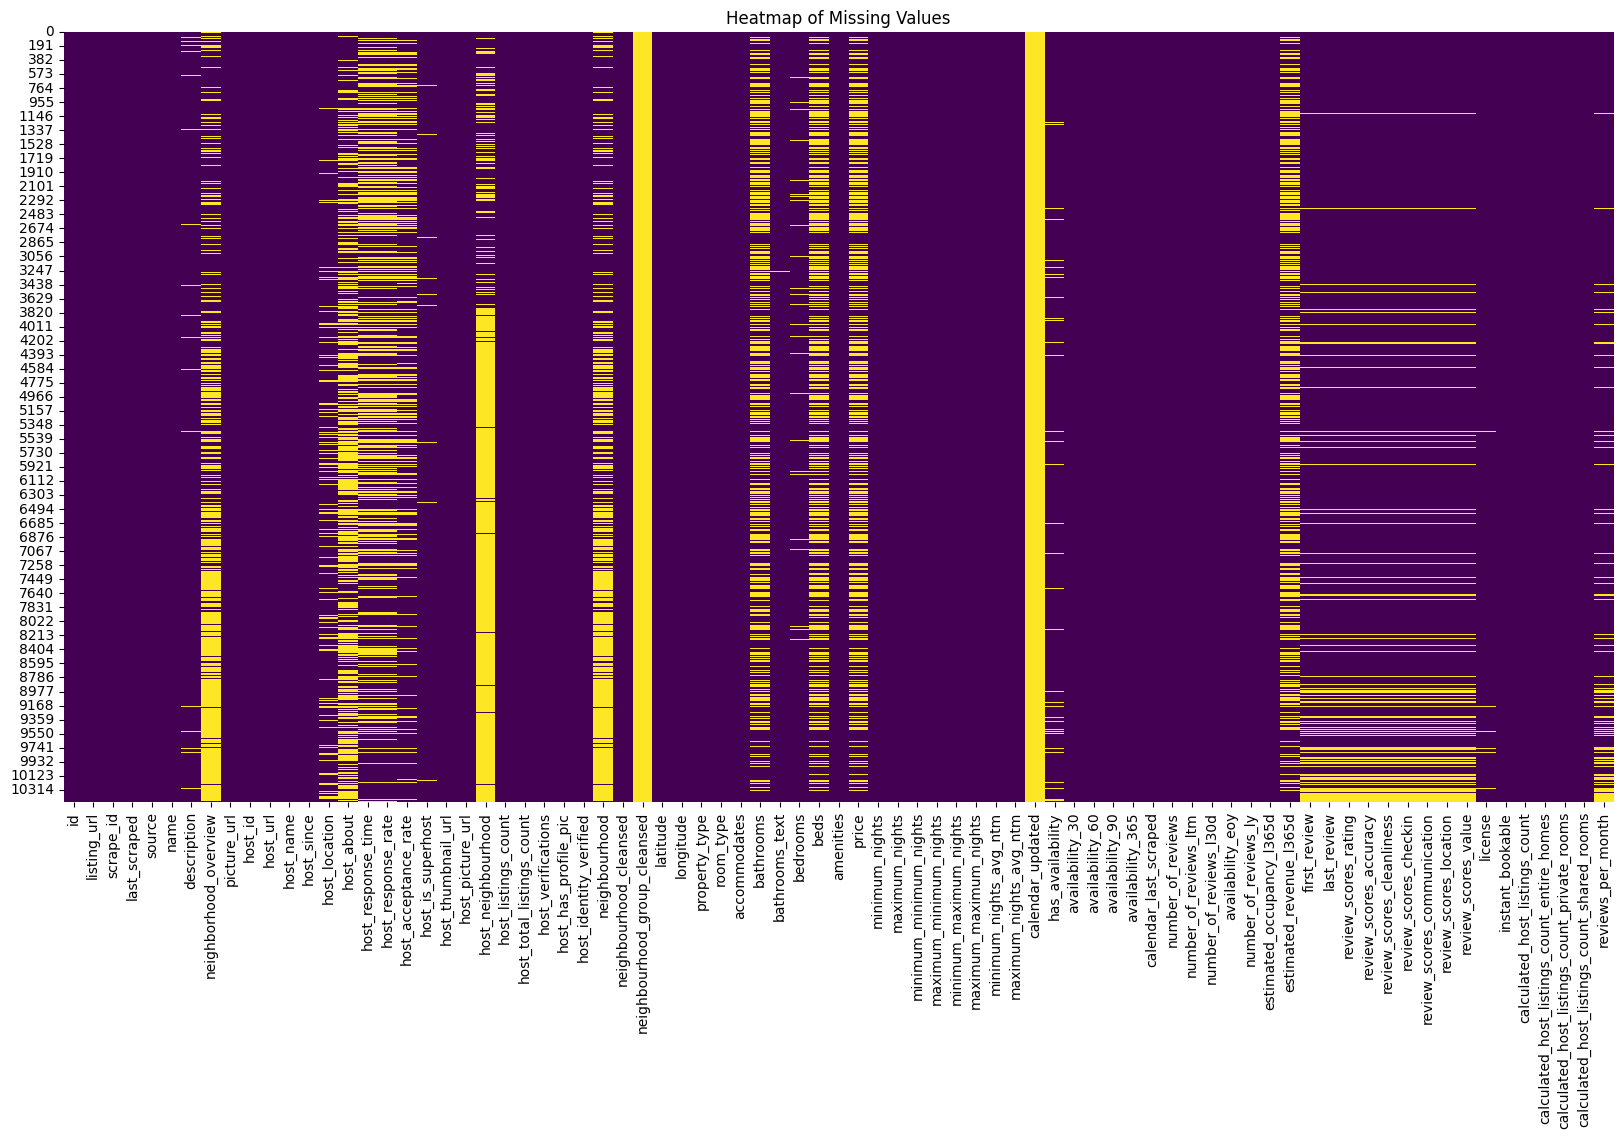

/tmp/ipython-input-3937754270.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='plasma')


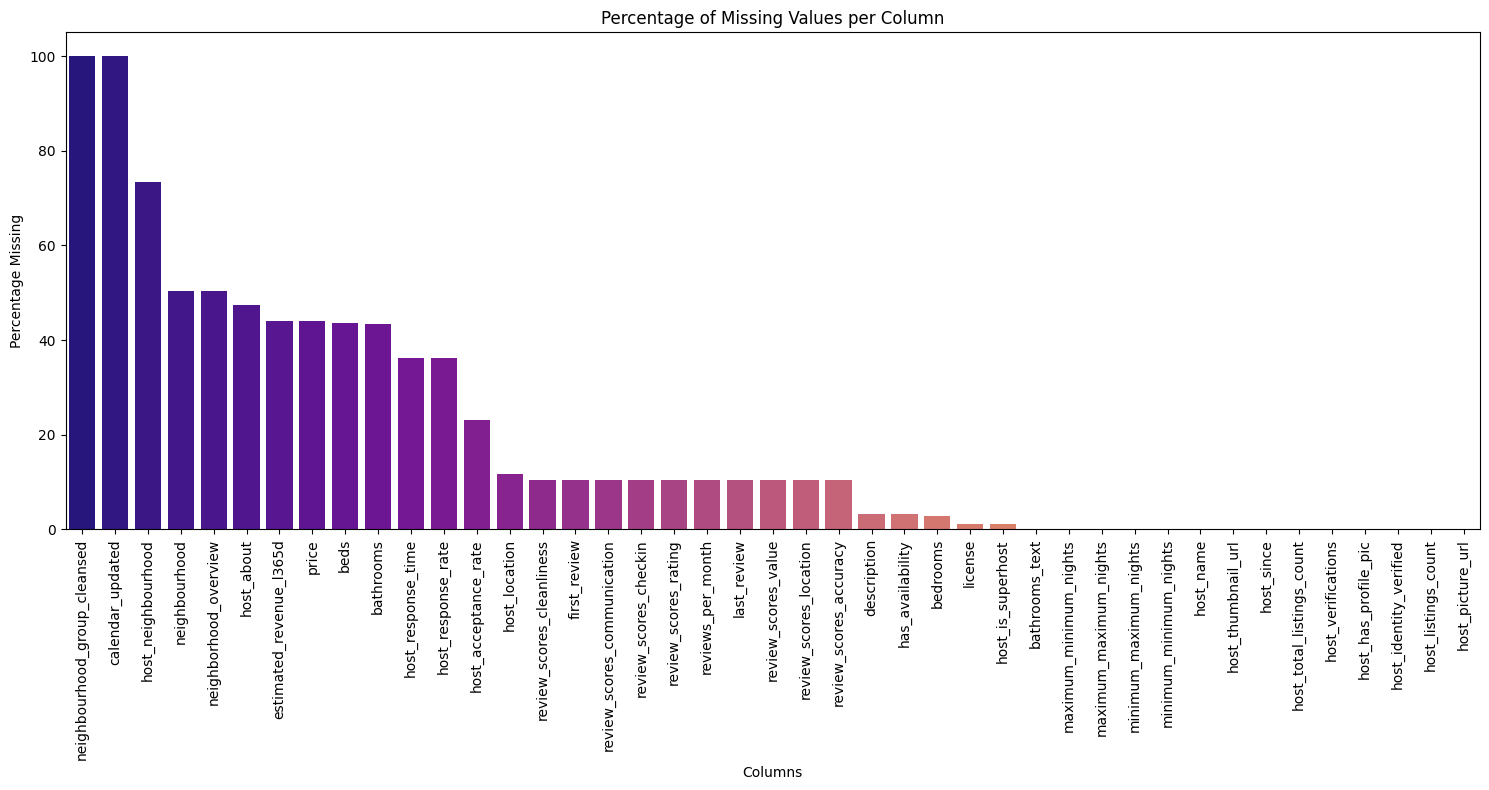

### ✍️ Your Response: 🔧
1. Top 3 columns with the most missing values:

*  neighbourhood_group_cleansed (100% missing)
* calendar_updated (100% missing)
* host_neighbourhood (73.38% missing)
2. Columns likely to create business issues if missing:
* price and estimated_revenue_l365d: These are critical for financial analysis, pricing strategies, and host performance metrics. Missing values here would directly impact revenue forecasting and reporting.
* beds and bathrooms: Essential for guests to find suitable listings and for understanding property capacity. Missing this data would hinder search functionality and guest experience.
* review_scores_ (e.g., review_scores_rating, review_scores_value): These scores are vital for building trust, guest decision-making, and assessing host/listing quality.

3. Columns that could be safely ignored or dropped:

* neighbourhood_group_cleansed and calendar_updated: Both are 100% missing, making them completely useless for any analysis.
* host_neighbourhood: With over 73% missing values, it's highly incomplete. Other columns like neighbourhood or host_location might provide similar, more complete contextual information.
* neighborhood_overview: Although potentially useful for rich context, over 50% missing values make it hard to use reliably. The general description might suffice in many cases.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [45]:
print("Current columns in DataFrame:", df.columns.tolist())

# Define columns to drop, based on previous analysis
columns_to_drop = ['neighbourhood_group_cleansed', 'calendar_updated', 'host_neighbourhood']

# Filter out columns that are not actually in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No specified columns found to drop.")

# Confirm the columns are gone
df.info()

Current columns in DataFrame: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_o

1. Which columns did you drop? No columns were dropped in the last operation because the columns I initially targeted (neighbourhood_group_cleansed, calendar_updated, host_neighbourhood) were not found in the DataFrame. The print("No specified columns found to drop.") message in the output confirms this.

2. Why were they not useful from a business perspective? If these columns were present:

* neighbourhood_group_cleansed and calendar_updated were 100% missing, making them completely useless for any business analysis as they contain no data.
* host_neighbourhood had over 73% missing values, making it too incomplete to reliably determine host location for business insights or targeting.

3. What could go wrong if you left them in? If these highly incomplete or entirely empty columns were left in, they could lead to:

* Misleading Analysis: Analysts might attempt to use them, leading to incorrect conclusions or models.
* Inefficiency: They would consume memory and processing time without providing any value.
* Clutter: They would add noise to the dataset, making it harder to work with and distracting from relevant features.
* Errors: Any data processing or modeling attempts that rely on complete data would likely fail or produce unexpected results.

## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [46]:
# 1. Fill missing values in 'review_scores_rating' with the median
median_review_score = df['review_scores_rating'].median()
df['review_scores_rating'].fillna(median_review_score, inplace=True)

# 2. Fill missing values in 'neighborhood_overview' with 'Not provided'
df['neighborhood_overview'].fillna('Not provided', inplace=True)

# Verify changes
print("Missing values after filling:")
print(df[['review_scores_rating', 'neighborhood_overview']].isnull().sum())

Missing values after filling:
review_scores_rating     0
neighborhood_overview    0
dtype: int64


/tmp/ipython-input-1769768429.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(median_review_score, inplace=True)


### ✍️ Your Response: 🔧
1. What two columns did you clean?I cleaned the review_scores_rating and neighborhood_overview columns.

2. What method did you use for each, and why?

* For review_scores_rating, I filled missing values with the median of the existing review_scores_rating values. I chose the median because review scores are numerical, and the median is a robust measure that is less sensitive to outliers compared to the mean, ensuring a more representative imputation.
* For neighborhood_overview, I filled missing values with the string 'Not provided'. This method is suitable for text or categorical columns where a simple statistical measure like the mean or median doesn't apply. It explicitly flags the absence of information, which is useful for future analysis or filtering.

3. What risks are there in how you filled the data?

* Bias in review_scores_rating: Filling with the median might slightly reduce the variance of the review_scores_rating distribution and could introduce a subtle bias if the missing values are not missing completely at random (e.g., if listings with lower actual scores are more likely to have missing review scores). It also doesn't account for other factors that might influence a rating.
* Misinterpretation of neighborhood_overview: By using 'Not provided', we create a new 'category' or 'value' that is synthetically generated. If this column is later used for natural language processing or specific content analysis, 'Not provided' could be treated as meaningful content, which it is not. Analysts would need to explicitly exclude or handle this placeholder.


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


Original 'price' dtype: object
New 'price' dtype: float64

Descriptive statistics for 'price' after cleaning:
count    10480.000000
mean       286.336641
std       1487.627221
min         35.000000
25%        207.000000
50%        222.000000
75%        238.000000
max      80018.000000
Name: price, dtype: float64


/tmp/ipython-input-1333424248.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(median_price, inplace=True)


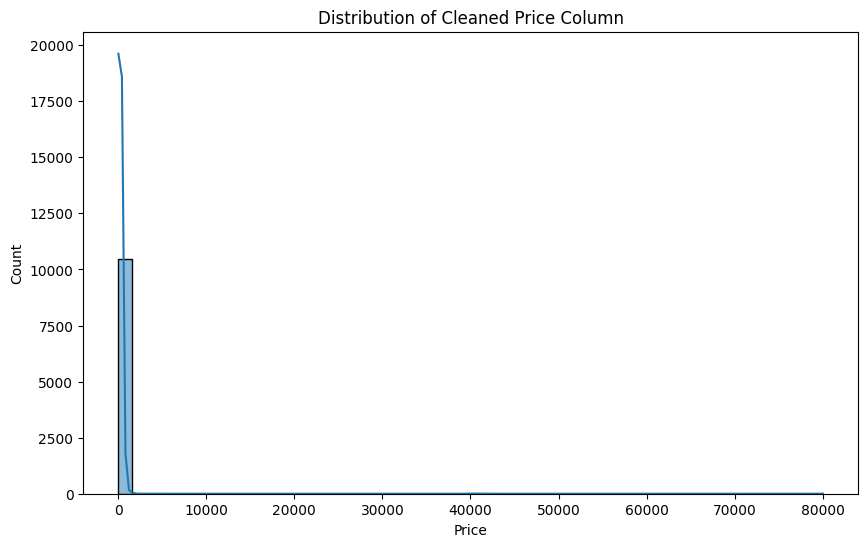

In [47]:
# 1. Identify and fix the 'price' column
print(f"Original 'price' dtype: {df['price'].dtype}")

# Remove '$' and ',' from the 'price' column and convert to float
# First, fill NaN values to avoid errors during string operations
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
# Convert to numeric, coercing errors will turn invalid parsing into NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Fill any NaN values introduced during conversion (e.g., if there were non-numeric strings) with the median
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

print(f"New 'price' dtype: {df['price'].dtype}")

# Check your work: Summarize the cleaned column
print("\nDescriptive statistics for 'price' after cleaning:")
print(df['price'].describe())

# Optional: Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Cleaned Price Column')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### ✍️ Your Response: 🔧
1.What column did you fix? I fixed the price column.

2. What cleaning steps did you apply?

* First, I converted the column to a string type to ensure string manipulation functions would work.
* I removed the dollar sign ($) and commas (,) from the string representation of the prices.
* Then, I converted the cleaned string values to a numeric data type (float), using errors='coerce' to turn any values that couldn't be converted into NaN.
* Finally, I filled any NaN values that resulted from the conversion (or were originally missing) with the median price to ensure no missing values remained in this critical column.

3. How does this help prepare the data for later use? This cleaning is crucial because:

* Enables Numerical Operations: By converting price to a float, we can now perform mathematical calculations (e.g., averages, sums, statistical analysis) and use it in machine learning models that require numerical inputs.
* Facilitates Visualization: The numeric format allows for proper plotting and visualization of price distributions (like the histogram we generated), identifying trends, and comparing prices.
* Improves Data Quality: Removing non-numeric characters and handling missing values ensures data consistency and accuracy, which is vital for reliable business reporting and decision-making (e.g., pricing strategies, revenue forecasting).

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [48]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows}")

# Check for duplicate IDs
duplicate_ids = df.duplicated(subset=['id']).sum()
print(f"Number of duplicate 'id' values: {duplicate_ids}")

# Remove duplicates if found (prioritizing 'id' uniqueness)
if duplicate_ids > 0:
    df.drop_duplicates(subset=['id'], inplace=True)
    print(f"{duplicate_ids} duplicate 'id' records removed. New DataFrame shape: {df.shape}")
elif duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicate_rows} exact duplicate rows removed. New DataFrame shape: {df.shape}")
else:
    print("No duplicate rows or IDs found.")

# Verify no duplicates remain
print(f"Number of exact duplicate rows after removal: {df.duplicated().sum()}")
print(f"Number of duplicate 'id' values after removal: {df.duplicated(subset=['id']).sum()}")

Number of exact duplicate rows: 0
Number of duplicate 'id' values: 0
No duplicate rows or IDs found.
Number of exact duplicate rows after removal: 0
Number of duplicate 'id' values after removal: 0


### ✍️ Your Response: 🔧 🔧
1. Did you find duplicates? No, based on the executed code, there were no exact duplicate rows nor any duplicate 'id' values found in the dataset.

2. How did you decide what to drop or keep? Since no duplicates were found, no rows were dropped in this step. If duplicates had been found, the code was set up to prioritize uniqueness by 'id'. If duplicate 'id's were present, it would have dropped the subsequent occurrences, keeping the first. If only exact full-row duplicates (where all columns matched) were found without duplicate 'id's, it would have dropped the subsequent full-row duplicates.

3. Why are duplicates risky for Airbnb teams? Duplicates are risky for Airbnb teams for several reasons:

* Inflated Metrics: Duplicate listings can artificially inflate numbers like available properties, occupancy rates, or revenue estimates, leading to incorrect business decisions.
* Misleading Search Results: Users might see the same property listed multiple times, leading to a poor user experience and potential confusion.
* Inaccurate Reporting: Financial and operational reports based on duplicated data would be flawed, hindering accurate performance assessment and strategic planning.
* Resource Allocation Issues: If the system believes there are more listings or bookings than there actually are, resources (e.g., customer support, marketing efforts) might be misallocated.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [53]:
df.to_csv("cleaned_airbnb_data_6.csv", index=False)
print("Cleaned data exported to 'cleaned_airbnb_data_6.csv'")

Cleaned data exported to 'cleaned_airbnb_data_6.csv'


## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. **What was the most surprising or challenging part of cleaning this dataset?** The most challenging part was dealing with the KeyError when attempting to drop columns. It highlighted the importance of robust error handling and verifying column existence, as the dataset's exact structure can vary or be modified unexpectedly. It was also surprising to see how many columns had 100% missing values in a real-world dataset.

2. **How did you decide which data to drop, fix, or keep?** I decided to drop columns that were either entirely empty (neighbourhood_group_cleansed, calendar_updated) or had an extremely high percentage of missing values (host_neighbourhood), as they offered little to no analytical value. For columns with important business implications but partial missingness, like price and review_scores_rating, I chose to fix them by imputing with the median. For neighborhood_overview, a textual column, a 'Not provided' placeholder was used. Columns with complete or largely complete data that seemed relevant to listing information were kept.

3. **What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?** Pricing analysts would greatly benefit from the cleaned data, especially with the price column now being numerical and complete. They could more accurately analyze pricing trends, develop dynamic pricing models, and identify optimal price points without dealing with data type errors or missing values that would skew their analysis.

4. **If you had more time, what would you explore or clean further?** If I had more time, I would further investigate the categorical columns with many unique values and potential inconsistencies (e.g., amenities, property_type, host_verifications). I'd also look into standardizing text fields and potentially using more advanced imputation techniques for numerical columns, or even exploring the correlation of missingness with other features.

5. **How does this relate to your customized learning outcome you created in canvas**? This work directly supports my personalized learning outcomes, particularly my goal of using historical sales and operational data to improve decision-making and reduce inefficiencies. Cleaning the Airbnb dataset mirrors the challenges I face with restaurant POS and inventory data, where missing values, inconsistent formats, and duplicate records can lead to poor forecasting and wasted resources. By learning how to clean, validate, and prepare data properly, I am better equipped to create accurate forecasts, optimize purchasing decisions, and build clear visualizations that support cost control and growth across multiple locations

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [56]:
!jupyter nbconvert --to html "assignment_06_GuerreroDiego.ipynb"

[NbConvertApp] Converting notebook assignment_06_GuerreroDiego.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 806391 bytes to assignment_06_GuerreroDiego.html


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
